In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels as sm
import os
import csv
from zipfile import ZipFile
from datetime import datetime
from sklearn import preprocessing


In [31]:
Test=pd.read_excel('Test.xlsx',sheet_name='Sheet1')
Train=pd.read_excel('Train.xlsx',sheet_name='Sheet1')

In [32]:
# Create a new column 'Name' in Test dataset with M if male or F if feminine 
Test['Sex'] = Test['Name'].str.split(". ").str[0].apply(lambda x: 'M' if x == 'Mr' else 'F')
Test.head()

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Sex
0,34886,Mr. Dan Kerr,"May 13,2012",Europe,Married,Wife,Northbury,Bachelors + PostGraduation,16,Private Sector - Services,Sales,40,0,0,M
1,34887,Miss Olivia Grant,"August 9,2014",Europe,Single,Other Family,Northbury,Bachelors + PostGraduation,16,Private Sector - Services,Professor,36,0,0,F
2,34888,Mr. Trevor Simpson,"May 23,2020",Europe,Divorced,Other Family,Northbury,Professional School + PostGraduation,13,Private Sector - Services,Management,50,12940,0,M
3,34889,Mr. David Clark,"April 15,2016",Europe,Married,Wife,Northbury,Professional School,12,Private Sector - Services,Professor,48,0,1827,M
4,34890,Mr. Gavin Lambert,"April 22,2011",Europe,Married,Wife,Watford,Bachelors,15,Public Sector - Others,Professor,45,0,0,M


In [33]:
# Create a new column 'Name' in Train dataset with M if male or F if feminine
Train['Sex'] = Train['Name'].str.split(". ").str[0].apply(lambda x: 'M' if x == 'Mr' else 'F')

In [34]:
Train.head()

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income,Sex
0,12486,Mr. Adam Glover,"July 1,2003",Europe,Married,Wife,Northbury,High School + PostGraduation,13,Private Sector - Services,Repair & constructions,40,0,2273,1,M
1,12487,Mr. Cameron McDonald,"January 25,2006",Europe,Married,Wife,Northbury,Professional School,12,Public Sector - Others,Repair & constructions,40,0,0,1,M
2,12488,Mr. Keith Davidson,"May 10,2009",Europe,Married,Wife,Northbury,Professional School,12,Private Sector - Services,Sales,46,0,2321,1,M
3,12489,Mr. Alexander Gill,"March 25,1985",Europe,Married,Wife,Northbury,High School - 2nd Cycle,11,Private Sector - Services,Security,37,5395,0,1,M
4,12490,Mr. Neil Piper,"May 29,2015",Europe,Single,Other Family,Northbury,PhD,21,Self-Employed (Individual),Professor,45,0,0,1,M


## First phase

Identify the people who belong to each class. 

In [35]:
# Create a new column 'Group' in the train dataset
groups = []
for i in range(len(Train)):
    if Train['Money Received'][i] > 0:
        groups.append('B')
    elif Train['Ticket Price'][i] > 0:
        groups.append('C')
    else:
        groups.append('A')
Train['Group'] = groups
Train

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income,Sex,Group
0,12486,Mr. Adam Glover,"July 1,2003",Europe,Married,Wife,Northbury,High School + PostGraduation,13,Private Sector - Services,Repair & constructions,40,0,2273,1,M,C
1,12487,Mr. Cameron McDonald,"January 25,2006",Europe,Married,Wife,Northbury,Professional School,12,Public Sector - Others,Repair & constructions,40,0,0,1,M,A
2,12488,Mr. Keith Davidson,"May 10,2009",Europe,Married,Wife,Northbury,Professional School,12,Private Sector - Services,Sales,46,0,2321,1,M,C
3,12489,Mr. Alexander Gill,"March 25,1985",Europe,Married,Wife,Northbury,High School - 2nd Cycle,11,Private Sector - Services,Security,37,5395,0,1,M,B
4,12490,Mr. Neil Piper,"May 29,2015",Europe,Single,Other Family,Northbury,PhD,21,Self-Employed (Individual),Professor,45,0,0,1,M,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22395,34881,Mrs. Lisa Alsop,"March 15,2023",Europe,Divorced,Children,Northbury,Professional School,12,Private Sector - Services,Cleaners & Handlers,40,0,0,0,F,A
22396,34882,Mr. Julian Coleman,"March 7,2025",Europe,Single,Children,Northbury,Professional School,12,Private Sector - Services,Other services,35,0,0,0,M,A
22397,34883,Miss Amelia Walker,"July 20,2022",Europe,Single,Other Family,Northbury,Masters,17,Public Sector - Others,Professor,40,2674,0,0,F,B
22398,34884,Mr. Justin Sutherland,"June 11,2011",Europe,Single,Other Family,Northbury,Bachelors + PostGraduation,16,Private Sector - Services,Repair & constructions,90,0,0,1,M,A


In [7]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22400 entries, 0 to 22399
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CITIZEN_ID              22400 non-null  int64 
 1   Name                    22400 non-null  object
 2   Birthday                22400 non-null  object
 3   Native Continent        22400 non-null  object
 4   Marital Status          22400 non-null  object
 5   Lives with              22400 non-null  object
 6   Base Area               22400 non-null  object
 7   Education Level         22400 non-null  object
 8   Years of Education      22400 non-null  int64 
 9   Employment Sector       22400 non-null  object
 10  Role                    22400 non-null  object
 11  Working Hours per week  22400 non-null  int64 
 12  Money Received          22400 non-null  int64 
 13  Ticket Price            22400 non-null  int64 
 14  Income                  22400 non-null  int64 
 15  Se

In [8]:
Train.isnull().any()

CITIZEN_ID                False
Name                      False
Birthday                  False
Native Continent          False
Marital Status            False
Lives with                False
Base Area                 False
Education Level           False
Years of Education        False
Employment Sector         False
Role                      False
Working Hours per week    False
Money Received            False
Ticket Price              False
Income                    False
Sex                       False
Group                     False
dtype: bool

In [9]:
Train.describe()

,CITIZEN_ID,Years of Education,Working Hours per week,Money Received,Ticket Price,Income
count,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000
mean,23685.500000,13.173884,40.483795,1324.915357,109.145313,0.237098
std,6466.467351,2.512451,12.370921,9227.771813,500.208904,0.425313
min,12486.000000,2.000000,1.000000,0.000000,0.000000,0.000000
25%,18085.750000,12.000000,40.000000,0.000000,0.000000,0.000000
50%,23685.500000,13.000000,40.000000,0.000000,0.000000,0.000000
75%,29285.250000,15.000000,45.000000,0.000000,0.000000,0.000000
max,34885.000000,21.000000,99.000000,122999.000000,5358.000000,1.000000


### Outliers

In [51]:
# Non categorical features
non_cat = Train[['Years of Education', 'Working Hours per week', 'Ticket Price']]


**Years of Education**

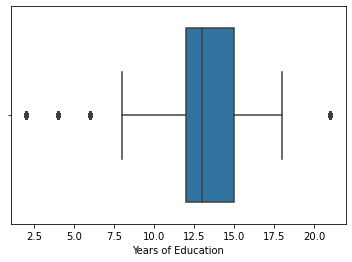

In [52]:
sns.boxplot(x=non_cat['Years of Education'])

In [78]:
Q1 = non_cat['Years of Education'].quantile(0.25)
Q3 = non_cat['Years of Education'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

3.0


In [89]:
Train[(Train['Years of Education'] < (Q1 - 1.5 * IQR)) |(Train['Years of Education'] > (Q3 + 1.5 * IQR))]


,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income,Sex,Group
4,12490,Mr. Neil Piper,"May 29,2015",Europe,Single,Other Family,Northbury,PhD,21,Self-Employed (Individual),Professor,45,0,0,1,M,A
54,12540,Mr. James Terry,"March 23,2002",Europe,Single,Other Family,Northbury,PhD,21,Private Sector - Services,Professor,40,0,0,1,M,A
87,12573,Mr. Jack Hill,"January 29,2001",Europe,Married,Wife,Northbury,PhD,21,Self-Employed (Individual),Transports,45,0,2462,0,M,C
119,12605,Mr. Richard Nash,"July 12,2025",Europe,Married,Other relatives,Fanfoss,Middle School - 1st Cycle,6,Private Sector - Services,Transports,40,0,0,0,M,A
153,12639,Mr. Thomas Gill,"July 9,2021",Europe,Single,Other relatives,Fanfoss,Middle School - 1st Cycle,6,Private Sector - Services,Other services,40,0,0,0,M,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22129,34615,Mr. Robert Short,"January 10,2011",Europe,Married,Wife,Fanfoss,Primary School,4,Private Sector - Services,Other services,53,0,0,0,M,A
22328,34814,Mr. Stewart Newman,"January 23,1990",America,Married - Spouse Missing,Alone,Northbury,Primary School,4,?,?,40,0,0,0,M,A
22350,34836,Mr. Brian Stewart,"February 24,1993",Europe,Married,Wife,Fanfoss,Middle School - 1st Cycle,6,Private Sector - Services,Machine Operators & Inspectors,40,0,0,0,M,A
22365,34851,Mr. Simon Morgan,"May 23,2017",Europe,Single,Children,Fanfoss,Middle School - 1st Cycle,6,Private Sector - Services,Other services,40,0,0,0,M,A


**Working Hours per Week**

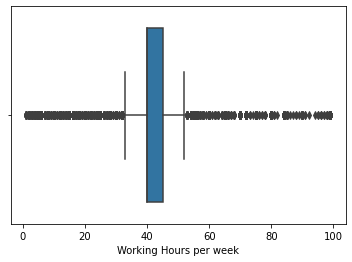

In [53]:
sns.boxplot(x=non_cat['Working Hours per week'])

In [90]:
Q1 = non_cat['Working Hours per week'].quantile(0.25)
Q3 = non_cat['Working Hours per week'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

5.0


In [91]:
Train[(Train['Working Hours per week'] < (Q1 - 1.5 * IQR)) |(Train['Working Hours per week'] > (Q3 + 1.5 * IQR))]

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Years of Education,Employment Sector,Role,Working Hours per week,Money Received,Ticket Price,Income,Sex,Group
5,12491,Mr. Adrian Walsh,"September 1,2024",Europe,Single,Children,Northbury,Bachelors,15,Private Sector - Services,Cleaners & Handlers,30,0,0,0,M,A
11,12497,Mr. Peter Hemmings,"June 21,2029",Europe,Single,Children,Northbury,High School + PostGraduation,13,Private Sector - Services,Sales,20,0,0,0,M,A
12,12498,Miss Andrea Taylor,"January 17,2028",Asia,Single,Children,Northbury,High School + PostGraduation,13,Private Sector - Services,Administratives,15,0,0,0,F,A
17,12503,Mr. Isaac Martin,"June 15,2015",Europe,Married,Wife,Northbury,Bachelors + PostGraduation,16,Private Sector - Services,Professor,60,0,0,1,M,A
20,12506,Mrs. Jane Bower,"May 17,2019",Europe,Divorced,Alone,Northbury,High School + PostGraduation,13,Private Sector - Services,Sales,54,0,0,0,F,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22381,34867,Mr. Richard Tucker,"September 2,2023",Europe,Married,Wife,Northbury,Bachelors + PostGraduation,16,Public Sector - Others,Professor,60,0,0,0,M,A
22386,34872,Mr. Adrian Welch,"June 1,2010",Europe,Married,Wife,Northbury,Bachelors + PostGraduation,16,Private Sector - Services,Sales,60,0,0,1,M,A
22389,34875,Miss Sue Fisher,"August 15,2019",Europe,Single,Other Family,Northbury,Masters + PostGraduation,18,Public Sector - Others,Professor,70,0,0,0,F,A
22392,34878,Mr. Isaac Mills,"January 8,2011",Europe,Married,Wife,Northbury,Masters,17,Private Sector - Services,IT,60,0,0,1,M,A


**Ticket Price**

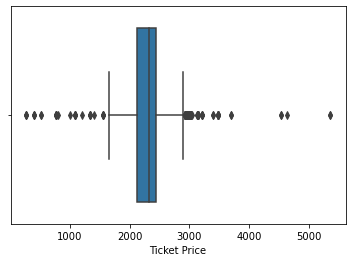

In [99]:
# Filtering the positives price of ticket
positive_price = non_cat[non_cat['Ticket Price']>0]['Ticket Price']
sns.boxplot(x=positive_price)

In [36]:
# Are all the features commensurate ?
train_data = Train.copy()
# Non categorical features normalization 
non_cat = Train[['Years of Education', 'Working Hours per week', 'Ticket Price']]
non_cat = preprocessing.normalize(non_cat)
non_cat = pd.DataFrame(non_cat)
non_cat = non_cat.rename(columns={0: "Years of Education", 1: "Working Hours per week", 2: 'Money Received', 3:'Ticket Price'  })

# Drop the non categorical features from train_data
train_data = train_data.drop(columns=['Years of Education', 'Working Hours per week', 'Money Received', 'Ticket Price'])

# Feature Selection
## Unsupervised feature selection

### Pearson Correlation

Correlation between non-categorical variables.

In [19]:
cor_pearson = non_cat.corr()
cor_pearson

,Years of Education,Working Hours per week,Money Received,Ticket Price
Years of Education,1.000000,0.478799,-0.525817,-0.386612
Working Hours per week,0.478799,1.000000,-0.753991,-0.553625
Money Received,-0.525817,-0.753991,1.000000,-0.066416
Ticket Price,-0.386612,-0.553625,-0.066416,1.000000


In [12]:
# Correlation between non-categorical variables
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()

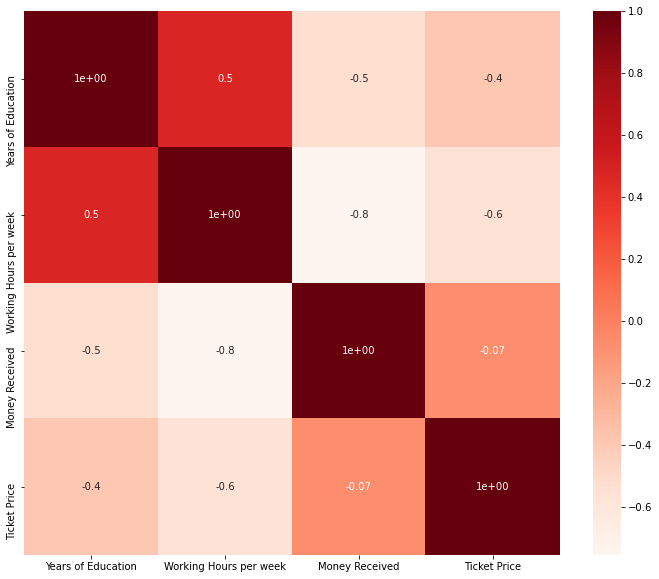

In [13]:
cor_pearson = non_cat.corr()
cor_heatmap(cor_pearson)

### Spearman Correlation

In [14]:
cor_spearman=non_cat.corr(method='spearman')
cor_spearman

,Years of Education,Working Hours per week,Money Received,Ticket Price
Years of Education,1.000000,-0.317266,-0.473544,-0.309165
Working Hours per week,-0.317266,1.000000,-0.473023,-0.310270
Money Received,-0.473544,-0.473023,1.000000,-0.066310
Ticket Price,-0.309165,-0.310270,-0.066310,1.000000


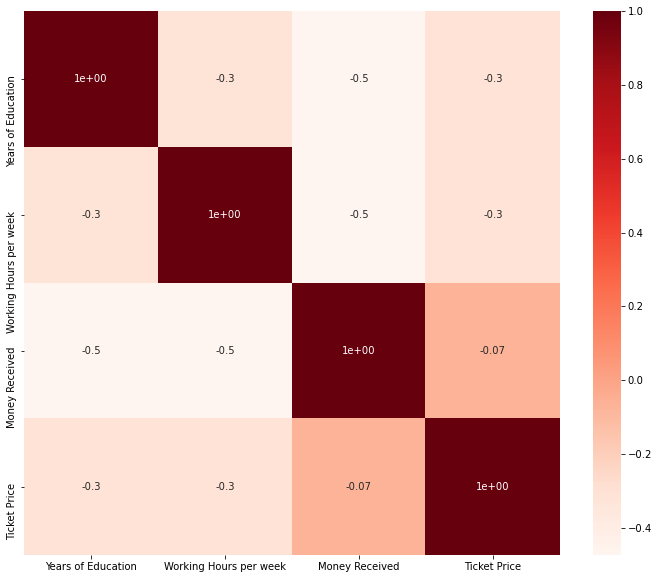

In [16]:
cor_heatmap(cor_spearman)

## Supervised
Use the target variable (e.g. remove irrelevant variables).

In [42]:
from IPython.display import Image
from IPython.core.display import HTML
Image(url= "https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/11/How-to-Choose-Feature-Selection-Methods-For-Machine-Learning.png")


### Categorical Input, Categorical Output
#### Chi-Squared 
The Chi-Squared test is a statistical hypothesis test that assumes (the null hypothesis) that the observed frequencies for a categorical variable match the expected frequencies for the categorical variable.

In [37]:
# Check the non categorical features dataset
train_data.head()

,CITIZEN_ID,Name,Birthday,Native Continent,Marital Status,Lives with,Base Area,Education Level,Employment Sector,Role,Income,Sex,Group
0,12486,Mr. Adam Glover,"July 1,2003",Europe,Married,Wife,Northbury,High School + PostGraduation,Private Sector - Services,Repair & constructions,1,M,C
1,12487,Mr. Cameron McDonald,"January 25,2006",Europe,Married,Wife,Northbury,Professional School,Public Sector - Others,Repair & constructions,1,M,A
2,12488,Mr. Keith Davidson,"May 10,2009",Europe,Married,Wife,Northbury,Professional School,Private Sector - Services,Sales,1,M,C
3,12489,Mr. Alexander Gill,"March 25,1985",Europe,Married,Wife,Northbury,High School - 2nd Cycle,Private Sector - Services,Security,1,M,B
4,12490,Mr. Neil Piper,"May 29,2015",Europe,Single,Other Family,Northbury,PhD,Self-Employed (Individual),Professor,1,M,A


In [38]:
from scipy.stats import chi2_contingency
obs = train

In [12]:
target = Train['Income']

In [16]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_val, y_train, y_val = train_test_split(Train, target, test_size=0.25, stratify = target, random_state=5)

In [18]:
modelNB = GaussianNB()